# So sánh mô hình Bayes bằng Information Criteria và Cross-validation
Bs Vương Kiến Thanh

- Lý thuyết
    1. [OVERFITTING - UNDERFITTING, và $R^2$](#1)
    2. [Giới thiệu `lppd`, một đại lượng thay cho $R^2$](#2)
    3. [Dùng tập test để đánh giá overfitting](#3)
    4. [Regularizing prior](#4)
    5. [So sánh mô hình bằng PSIS, WAIC](#5)
    
- [Thực hành so sánh mô hình](#21)

## 1. OVERFITTING - UNDERFITTING, và $R^2$ <a name="1"></a>
Thông thường, sau khi fit mô hình tuyến tính, ta thường dùng $R^2 = 1- \frac{\text{var}(residuals)}{\text{var}(outcome)}$ để đánh giá mức độ giải thích của mô hình về variance của data. $R^2$ càng cao thì mô hình càng fit tốt. Tuy nhiên, bạn phải cẩn thận một hiện tượng khá thường gặp, đó là **OVERFITTING**, khi đó mô hình của bạn dự đoán rất tốt trong bộ data dùng để fit, nhưng rất tệ khi dùng trên một mẫu quan sát mới.

Cho nên, việc dùng $R^2$ để đánh giá mô hình là sai lầm. Ví dụ sau đây, với cùng một data, khi fit bằng mô hình tuyến tính và nâng dần bậc lũy thừa lên thì $R^2$ tăng lên, nhưng lại bị overfitting.

<img src="../docs/assets/images/fig 7-3.png">

**UNDERFITTING** thì ngược lại, khi mô hình <u>*quá ít parameter*</u> thì bias trong mô hình sẽ lớn và cũng cho kết quả dự đoán mới sẽ kém.

Hai hiện tượng này thường được gọi chung là **Bias-Variance Trade Off**.

## 2. Giới thiệu `lppd`, một đại lượng thay cho $R^2$ <a name="2"></a>
**Entropy** được định nghĩa là tính bất định trong một phân phối.
$$ \text{Entropy}(p) = H(p) = -\sum_{i=1}^{n} p_i \log(p_i) $$

Giả sử $(p)$ là mô hình thực, $(q)$ là mô hình mô phỏng.  
Sự khác nhau giữa entropy của 2 phân phối là **Kullback-Leibler divergence**, hay $D_{KL}$.
$$ \begin{matrix}
D_{KL} &=& \text{Cross_Entropy}(p, q) - \text{Entropy}(p)\\
&=& H(p,q) - H(p)\\
&=& -\sum_i p_i \log(q_i) - \left(- \sum_i p_i \log(p_i)\right) \\
&=& \sum_i p_i \log \left( \frac{p_i}{q_i} \right)\\
\end{matrix}$$

Khi $D_{KL}$ càng nhỏ, tức là mô hình $(q)$ gần với sự thật nhất $(p)$.

<img src="../docs/assets/images/fig 7-2.png">

Tuy nhiên, không phải ta luôn biết sẵn mô hình thực, cho nên không thể dùng $D_{KL}(p,q)$. Bù lại, ta có thể ước lượng $D_{KL}$ để so sánh giữa 2 mô hình mô phỏng khác nhau, $(p)$ và $(r)$. Khi đó, các giá trị $p$ sẽ bị triệt tiêu, chỉ còn $p_i \times \left(\sum_i \log (q_i) - \sum_i \log (r_i)\right) \propto \sum_i \log (q_i) - \sum_i \log (r_i) $.

Bản thân một mình $\sum_i \log(q_i)$ không cho biết mô hình là tốt hay kém, nhưng khi dùng $\sum_i \log (q_i) - \sum_i \log (r_i) $ sẽ cho biết được là mô hình nào tốt hơn.

Và đại lượng $S(q) = \sum_i \log (q_i)$ gọi là **log-pointwise-predictive-density** hay `lppd` score, là tiêu chuẩn vàng để đánh giá độ chính xác của dự đoán của mô hình. `lppd` lớn thì mô hình fit tốt hơn, bởi vì độ chính xác trung bình lớn hơn.

Người ta thường dùng đại lượng **Deviance** $=-2 S(q)$ hơn. Khi **Deviance** càng nhỏ thì mô hình càng fit tốt.

## 3. Dùng tập test để đánh giá overfitting

Deviance cũng có thể bị overfitting tương tự như $R^2$, do đó ta cần phải có tập test để đánh giá overfitting.

Ví dụ ở đây, ta biết được mô hình thực (có 3 param), và dùng nó tạo ra tập test. Ta tạo mô hình mô phỏng lại từ 1 đến 5 param. Khi mô hình mô phỏng có 3 param thì nó fit tốt nhất, nhưng khi tăng số param lên thì deviance ở tập test tăng lên nhanh, tức là đã xảy ra overfitting.

<img src="../docs/assets/images/fig 7-3.png">

## 4. Regularizing prior<a name="4"></a>
Một trong những cách để giảm overfitting là dùng **regularizing prior**. Nó khá giống như *ridge regression* trong machine learning. Thay vì thêm một đại lượng penalty vào mô hình, ta dùng prior có variance hẹp hơn. Mức độ variance khác nhau ảnh hưởng đến mức độ kháng overfitting khác nhau.

Ví dụ với prior khác nhau của slope. Mô hình có 4,5 parameter là mô hình bị overfitting, nhưng với regularizing prior, mức độ overfitting bị giảm xuống.

<img src="../docs/assets/images/fig 7-4.png">

## 5. So sánh mô hình bằng PSIS, WAIC<a name="5"></a>

### a. Leave-one-out Cross Validation ( LOO-CV) và PSIS

LOO-CV là kỹ thuật lấy 1 mẫu từ tập train làm tập test, sau đó tính độ chính xác, bằng deviance chẳng hạn, làm lần lượt như vậy với toàn bộ mẫu còn lại. Tác vụ CV rất nặng máy, vì nó chạy theo kiểu iteration từng mẫu một.

Một phương pháp ước lượng LOO-CV tương đối thay cho việc chạy iteration từng mẫu là dùng **Pareto-smoothed importance sampling cross-validation (PSIS)**. 

Công thức PSIS khá phức tạp, gồm đặt trọng số từng mẫu LOO bằng inverse-prob của mẫu bị lấy ra, sau đó được pareto smoothing bằng pareto distribution.

### b. AIC, BIC, DIC, WAIC: gọi chung là information criteria

AIC có lẽ là information criterion nổi tiếng nhất. Nếu nhìn kỹ hình ở [phần 4](#4), bạn sẽ thấy hiệu giữa deviance của tập train và tập test sẽ bằng 2 lần số lượng parameter. Và nó cũng là công thức của AIC:

$$ AIC = D_{train} + 2p $$

BIC, DIC cũng tương tự, chúng áp dụng được khi:
1. Prior chứa ít thông tin, hay *phẳng*.
2. Posterior là Normal.
3. Số lượng mẫu *N* lớn hơn số lượng parameter *k*.

Hiện tại, chỉ số **WAIC - Widely Applicable Information Criterion** là phổ biến và tổng quát nhất để ước lượng deviance của tập test. Khi số lượng mẫu rất lớn, nó sẽ gần giống với PSIS.

$$ WAIC(y, \theta) = D_{train} + 2 \sum_i \text{var}_{\theta} \log p (y_i | \theta)  = D_{train} + 2 \times \text{penalty}$$

### c. Tính chất từng điểm ( pointwise nature )
Cả hai PSIS, WAIC đều có có tính pointwise. Do đó ta có thể tính được độ lệch chuẩn của nó.

Ngoài ra, nó cũng cho ta biết được mẫu nào trong tập data có ảnh hưởng lớn đến phân phối posterior, hay còn gọi là **outlier**, thông qua kết quả *'effective number of parameter'*, hay *penalty* trong WAIC.

References:
1. Chapter 7: Ulysses' Compass.  CRC Stats rethinking 2020
2. https://docs.pymc.io/notebooks/model_comparison.html

# Thực hành so sánh mô hình bằng WAIC và PSIS <a name="20"></a>

Giả sử đây là mô hình thực:

<img src="../docs/assets/images/fig 6-6.png">

In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import arviz as az

In [2]:
n = 100 #num of samples

h0 = np.random.normal(10,2, n)
treatment = np.repeat( np.arange(0,2), repeats=n//2)
fungus = np.random.binomial(1, 0.5 - treatment*0.4, n)
h1 = h0 + np.random.normal(5 - 3 * fungus)

d = pd.DataFrame({"h0": h0, "h1": h1, "treatment": treatment, "fungus": fungus})

In [3]:
d.head()

,h0,h1,treatment,fungus
0,9.415768,14.030222,0,0
1,6.873278,9.020501,0,1
2,10.177991,14.694236,0,0
3,8.965424,13.058583,0,0
4,7.831009,12.835623,0,0


Ta dựng 3 mô hình:
1. Đơn giản
2. Tuyến tính 2 predictor
3. Tuyến tính 1 predictor

In [4]:
with pm.Model() as m1: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    p = pm.Lognormal('p', 0, 0.025)
    sigma = pm.Exponential('sigma', 1)
    
    # Define likelihood
    likelihood = pm.Normal('h1', mu=h0*p, sigma=sigma, observed=h1)
    
    # Inference!
    trace_1 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 19 seconds.


In [5]:
with pm.Model() as m2: 
    a = pm.Lognormal('a', 0, 0.2)
    bt = pm.Normal('bt', 0, 0.5)
    bf = pm.Normal('bf', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    
    p = a + bt * treatment + bf * fungus
    mu = h0 * p
    likelihood = pm.Normal('h1', mu, sigma, observed=h1)

    trace_2 = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bf, bt, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 16 seconds.


In [6]:
with pm.Model() as m3: 
    a = pm.Lognormal('a', 0, 0.2)
    bt = pm.Normal('bt', 0, 0.5)
    sigma = pm.Exponential('sigma', 1)
    
    p = a + bt * treatment
    mu = h0 * p
    likelihood = pm.Normal('h1', mu, sigma, observed=h1)

    trace_3 = pm.sample(1000) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bt, a]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 16 seconds.


In [7]:
azdata_1 = az.from_pymc3(trace_1, model=m1)
azdata_2 = az.from_pymc3(trace_2, model=m2)
azdata_3 = az.from_pymc3(trace_3, model=m3)

## Tóm tắt posterior của 3 mô hình:

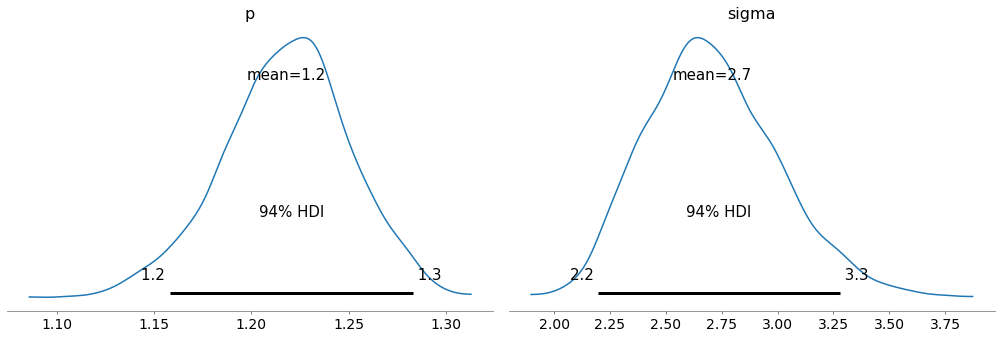

In [8]:
az.plot_posterior(azdata_1);

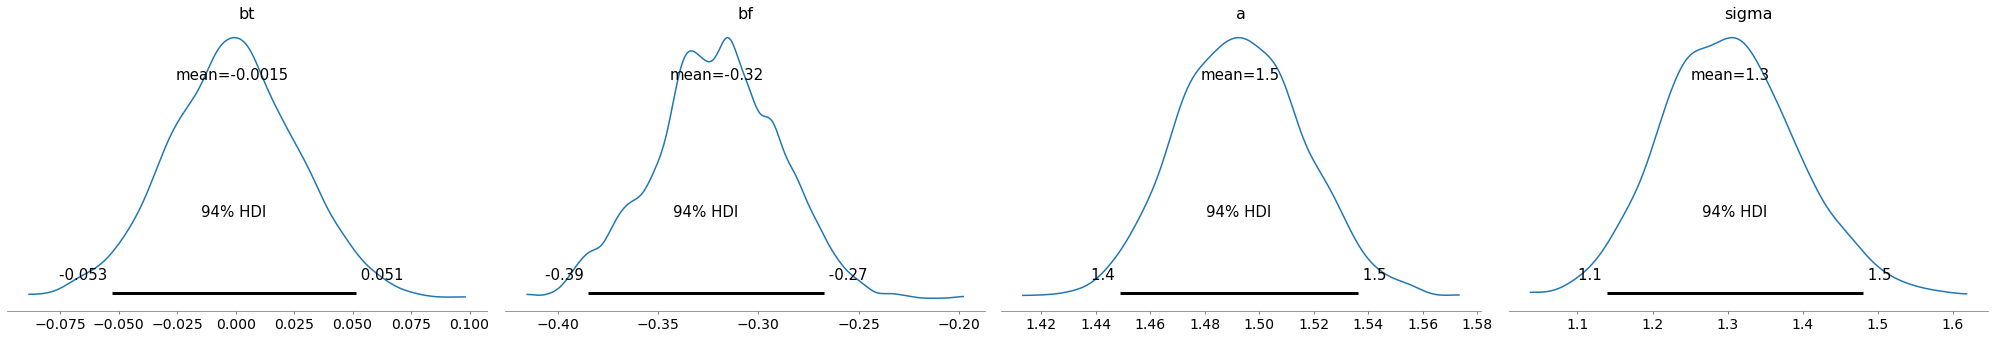

In [9]:
az.plot_posterior(azdata_2);

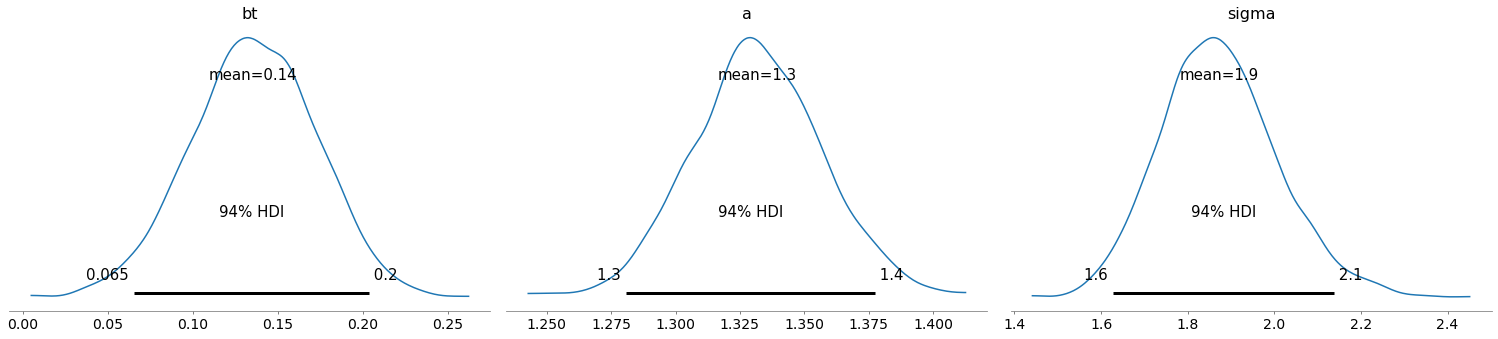

In [10]:
az.plot_posterior(azdata_3);

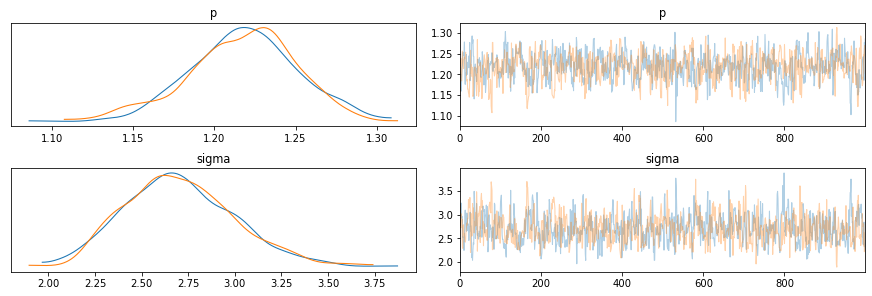

In [11]:
az.plot_trace(azdata_1);

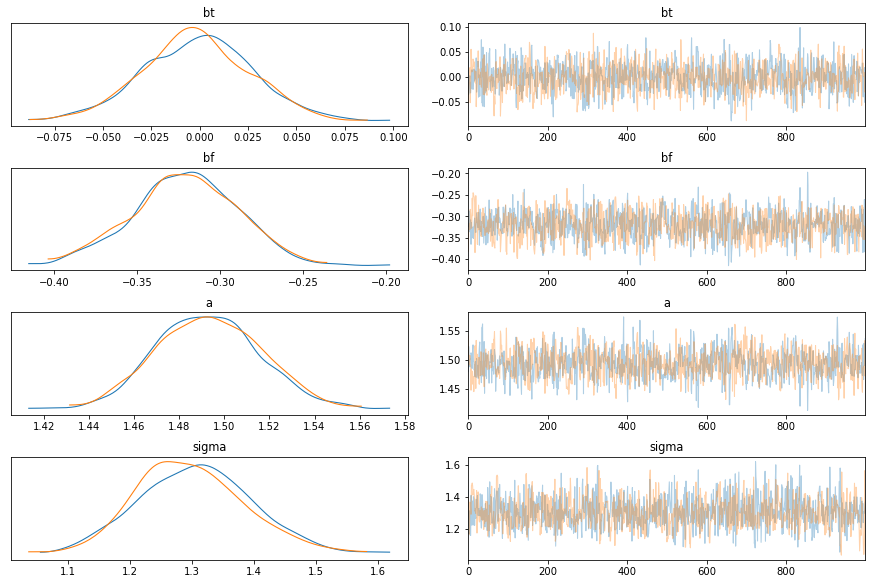

In [12]:
az.plot_trace(azdata_2);

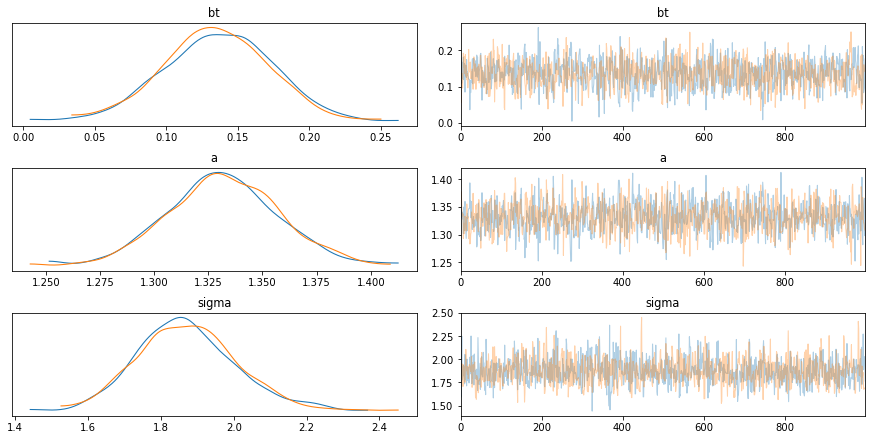

In [13]:
az.plot_trace(azdata_3);

## Tính WAIC và PSIS từ kết quả posterior của `m1`:

In [14]:
m1_waic = az.waic(azdata_1, pointwise=True, scale='deviance')
m1_waic

Computed from 2000 by 100 log-likelihood matrix

              Estimate       SE
deviance_waic   485.14     9.35
p_waic            1.50        -

In [15]:
m1_psis = az.loo(azdata_1, pointwise=True, scale='deviance')
m1_psis

Computed from 2000 by 100 log-likelihood matrix

             Estimate       SE
deviance_loo   485.14     9.35
p_loo            1.50        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      100  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

## So sánh `m1` `m2` `m3` bằng WAIC và PSIS

In [16]:
df_comp_waic = az.compare({"m1":azdata_1, "m2":azdata_2, "m3":azdata_3}, ic="waic", scale='deviance')
df_comp_waic

/Volumes/DATA/anaconda3/envs/jupyter/lib/python3.9/site-packages/arviz/stats/stats.py:1425: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
m2,0,340.672,3.83117,0,0.999999,14.094,0,True,deviance
m3,1,412.651,2.9365,71.9784,6.77724e-07,9.11144,15.2814,False,deviance
m1,2,485.143,1.5025,144.471,5.44369e-23,15.3396,13.3971,False,deviance


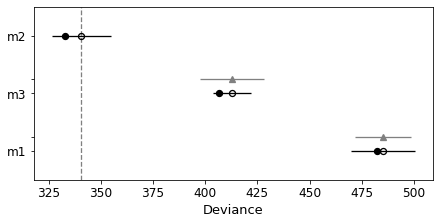

In [17]:
az.plot_compare(df_comp_waic);

## Cách đọc compare plot:

- Mô hình có deviance thấp nhất ( tốt nhất ) ở đầu.
- Dấu chấm đen là deviance của data.
- Dấu chẩm nhạt hơn là deviance của test_data tính được từ WAIC (hoặc PSIS), và khoảng tin cậy 95% của nó. 
- Hình tam giác là khoảng cách deviance từ mô hình đến mô hình tốt nhất, và khoảng tin cậy 95% của nó.



## Diễn giải kết quả compare WAIC:

Ta thấy `m2` có deviance thấp nhất, tức là `m2` là mô hình fit tốt nhất cho data. WAIC sẽ cho ta biết mô hình nào có khả năng dự đoán chính xác nhất.

`p_waic` là number of effective parameter, hay là penalty trong công thức.

`d_waic` là khoảng cách từ mô hình đến mô hình tốt nhất.

Kết quả `df_comp_waic.weight` thường được dùng để model averaging.

`se` và `dse` là Standard Error của WAIC và dWAIC.

Trong `df_comp_waic` có warning ở `m2`, ta hẫy thử lại bằng PSIS.

In [18]:
df_comp_psis = az.compare({"m1":azdata_1, "m2":azdata_2, "m3":azdata_3}, ic="loo", scale='deviance')
df_comp_psis

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
m2,0,340.69,3.84007,0,1,13.4592,0,False,deviance
m3,1,412.667,2.9446,71.9768,3.71335e-07,9.12129,15.2865,False,deviance
m1,2,485.143,1.50289,144.453,3.14207e-22,14.7738,13.401,False,deviance


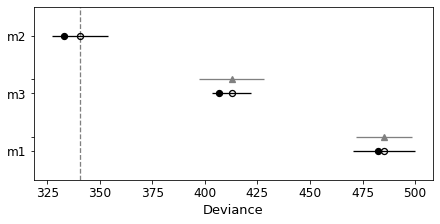

In [19]:
az.plot_compare(df_comp_psis);

In [20]:
m2_psis = az.loo(azdata_2, pointwise=True, scale='deviance')
m2_psis

Computed from 2000 by 100 log-likelihood matrix

             Estimate       SE
deviance_loo   340.69    15.17
p_loo            3.84        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      100  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [21]:
m2_psis.pareto_k.data

array([-0.03557232, -0.04479532,  0.00934072, -0.06117196, -0.07405937,
       -0.10178703, -0.03558451,  0.03833884, -0.02468632,  0.01246362,
       -0.07620086, -0.01425061,  0.11667382,  0.0856452 ,  0.15453286,
        0.03380988, -0.02717753, -0.06996731,  0.19388728,  0.00598919,
        0.12870138,  0.10509324, -0.07421189,  0.11433447,  0.01074099,
       -0.07992786,  0.03573668, -0.03185941, -0.16828247, -0.16635069,
       -0.17125976,  0.15639733, -0.22644281,  0.13557812,  0.02105615,
        0.04900698,  0.03239454,  0.30789438,  0.11296953,  0.02274094,
       -0.01094209, -0.1881092 , -0.06616017,  0.02931948,  0.0410182 ,
        0.00062209, -0.02376855, -0.07138963, -0.05485077,  0.06797948,
        0.01296521, -0.15997166,  0.17191856,  0.01380231,  0.0156595 ,
       -0.15928987, -0.07035073, -0.13283031,  0.00878043,  0.0630624 ,
       -0.06301373,  0.0270179 ,  0.0387183 ,  0.02855752, -0.13306904,
        0.11928282,  0.01231967, -0.08209226,  0.13878809,  0.05

## Diễn giải kết quả compare PSIS

Kết quả PSIS và WAIC cũng tương tự nhau.  
Nếu kết quả PSIS có warning, ta có thể dùng kết quả pareto_k từ psis để chẩn đoán quan sát nào là outlier. ( k >0.7 là outlier) 

|pareto_k | |
|-|-|
| (-Inf, 0.5]  | good     |
|  (0.5, 0.7]  | ok       |
|    (0.7, 1]  | bad      |
|    (1, Inf)  | very bad |

## Kết luận:

Mô hình `m2` là mô hình fit tốt nhất, cho dự đoán test_data tốt nhất.  

**Tuy nhiên**, nó không cho ta biết quan hệ nhân quả, bởi vì `m2` có posterior của `treatment` gần bằng zero, và `fungus` có hệ số âm. Điều này không phù hợp với mô hình nhân quả mà ta tạo ra.  
Dự đoán chính xác là 1 chuyện, suy luận nhân quả là 1 chuyện khác.